## Régression avec un Perceptron Multi-Couches

In [1]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#1- Créeation d'un ensemble de points suivant une fonction sinusoïde avec un bruit gaussien d'écart type 0,2

import numpy as np

x = np.linspace(0,8,20).reshape(-1,1) 
y = np.sin(x) + np.random.randn(20)*0.2

In [3]:
#2- Initialisation le MLP avec la fonction MLPRegressor avec 3 neurones cachés, une fonction d'activation linéaire et un pas d'apprentissage de 0,1 avec un nombre d’iterations de 100

from sklearn.neural_network import MLPRegressor

reg = MLPRegressor(hidden_layer_sizes=(3), activation='relu', learning_rate_init=0.1, max_iter=100)

In [4]:
#3- l'apprentissage du MLP

reg.fit(x,y)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=3, learning_rate='constant',
             learning_rate_init=0.1, max_iter=100, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [5]:
#4- predition pour faire de la régression

y_pred = reg.predict(x)
# print(y_pred)

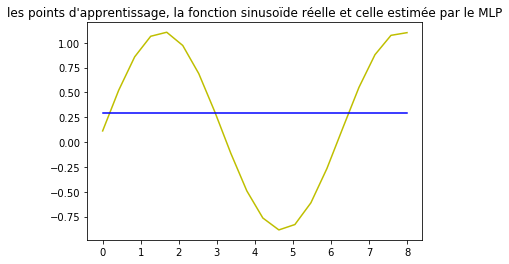

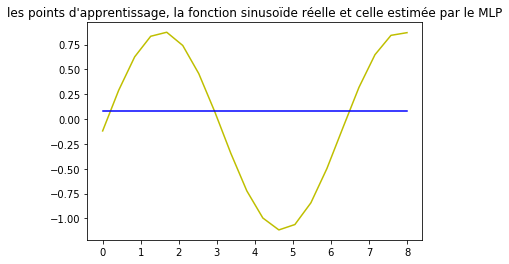

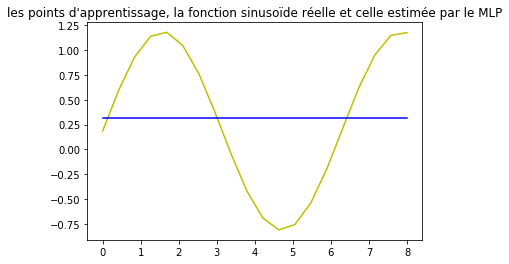

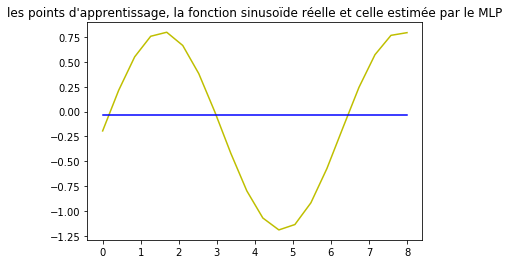

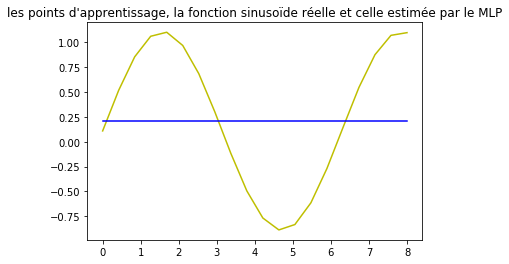

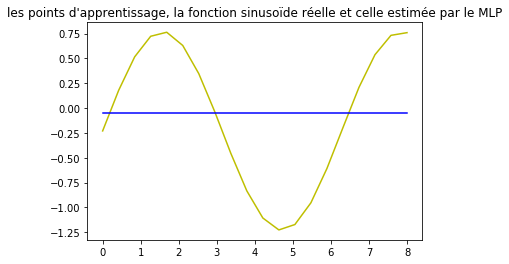

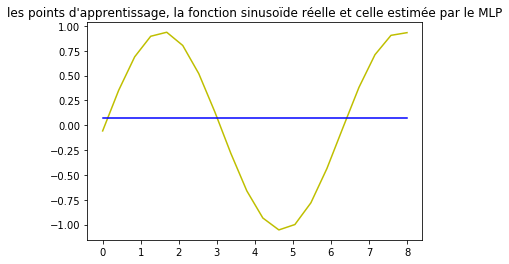

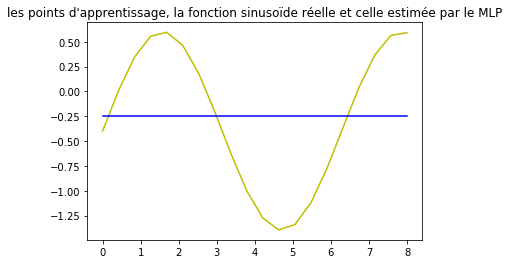

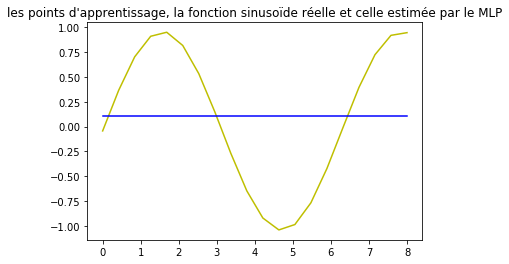

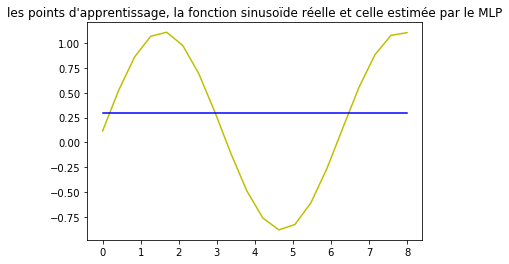

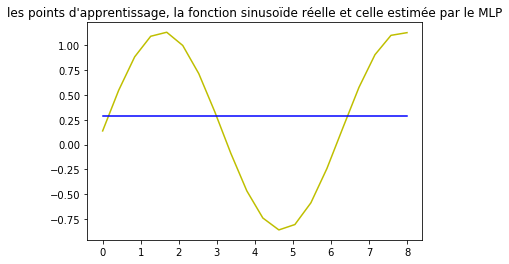

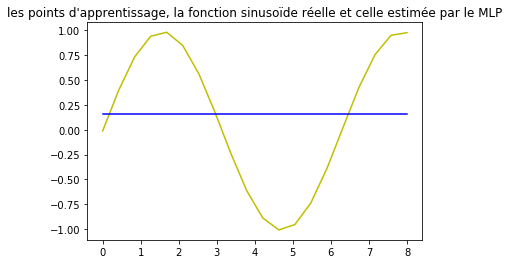

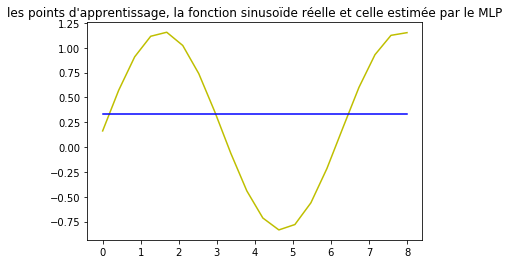

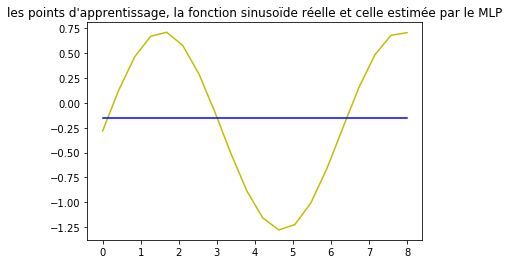

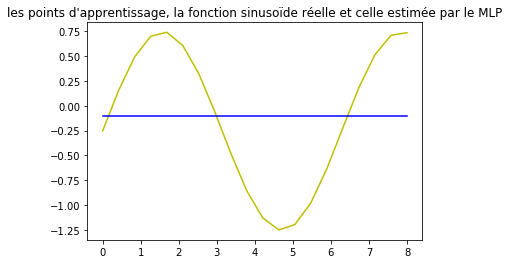

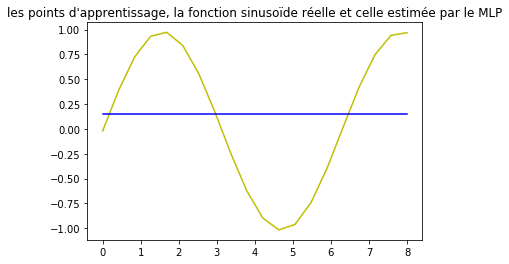

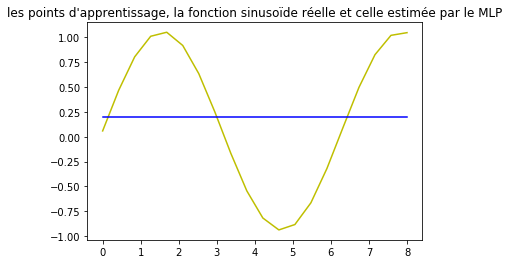

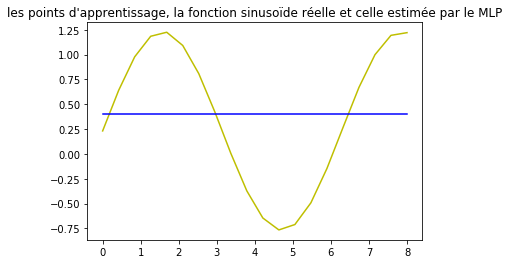

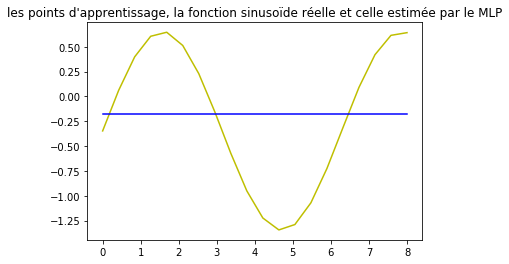

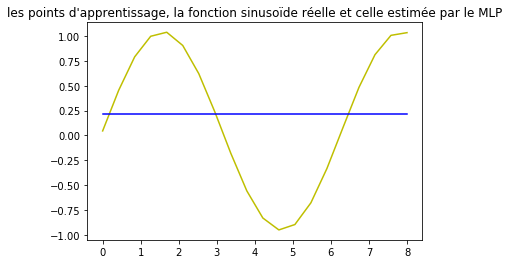

In [6]:
#5- tracage de les points d'apprentissage, la fonction sinusoïde réelle et celle estimée par le MLP

import matplotlib.pyplot as plt

for i in range(20):
    plt.plot(x, y[:,i], c='y', label='y')
    plt.plot(x, y_pred[:,i], c='b', label='y_pred')
    plt.title("les points d'apprentissage, la fonction sinusoïde réelle et celle estimée par le MLP")
    plt.show()

## Classification avec un Perceptron Multi-Couches

In [7]:
#1- Les données IRIS

from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

In [8]:
#2- binarisation de les numéros de classe

from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer()
label_binarizer.fit([0, 1, 2])
y_bin = label_binarizer.transform(y)

In [9]:
#3- Initialisation de MLP avec la fonction MLPClassifier, 2 neurones cachés, une fonction d'activation logistique et un pas d'apprentissage de 0,2

from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(2), activation="relu", learning_rate_init=0.2, solver='lbfgs', random_state=1)

In [10]:
#4- l'apprentissage du MLP avec la fonction fit

clf.fit(X,y_bin)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=2, learning_rate='constant',
              learning_rate_init=0.2, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

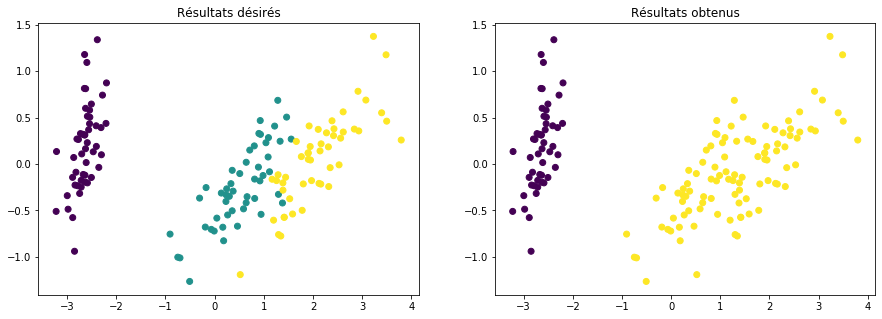

In [11]:
#5- Affichage des résultats désirés et les résultats obtenus

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

y_pred = clf.predict(X)
y_pred = label_binarizer.inverse_transform(y_pred)

irisPCA = PCA(n_components=2).fit(X).transform(X)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.scatter(irisPCA[:,0], irisPCA[:,1], c=y)
plt.title('Résultats désirés')

plt.subplot(1,2,2)
plt.scatter(irisPCA[:,0], irisPCA[:,1], c=y_pred)
plt.title('Résultats obtenus')

plt.show()

In [12]:
#5- Les résultats sont-ils bon ? 

from sklearn.metrics import confusion_matrix,accuracy_score

print("On remarque que le resultat est bon car il se trouve une seule erreur avec un resultat d'apprentissage est:", accuracy_score(y,y_pred))

On remarque que le resultat est bon car il se trouve une seule erreur avec un resultat d'apprentissage est: 0.6666666666666666


Score :  0.9866666666666667


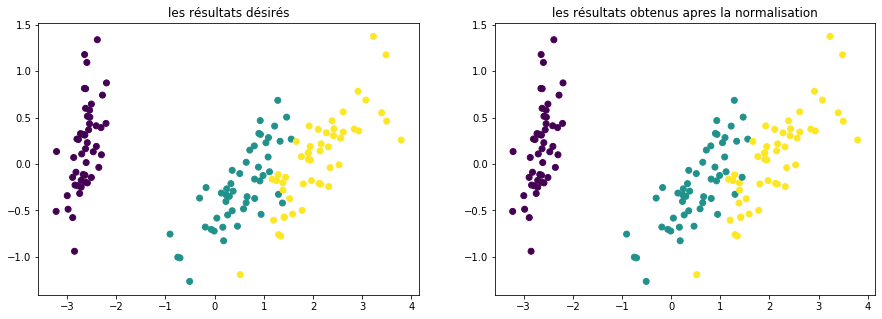

In [13]:
#6- Normalisation des données (X)

from sklearn.preprocessing import scale

X_scaled = scale(X)

clf.fit(X_scaled,y_bin)

y_pred_scaled = clf.predict(X_scaled)
y_pred_scaled = label_binarizer.inverse_transform(y_pred_scaled)

print("Score : ", accuracy_score(y, y_pred_scaled))

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.scatter(irisPCA[:,0], irisPCA[:,1], c=y)
plt.title('les résultats désirés')

plt.subplot(1,2,2)
plt.scatter(irisPCA[:,0], irisPCA[:,1], c=y_pred_scaled)
plt.title('les résultats obtenus apres la normalisation')

plt.show()

In [14]:
#6- Normalisation des données (X)

print("On remarque que le valeur de resultat d'apprentissage ne change pas")

On remarque que le valeur de resultat d'apprentissage ne change pas


In [15]:
#7- variation de les paramètres du MLP (nombre de neurones cachés, etc...)

# 2 hidden layers avec chaque layer contients 2 neurones et le pas d'apprentissage de 0,01
clf1 = MLPClassifier(hidden_layer_sizes=(2,2),solver='lbfgs',activation="logistic",learning_rate_init=0.01, random_state=1)
clf1.fit(X,y)
y_pred = clf1.predict(X)
print("Score: ", accuracy_score(y, y_pred))

# 2 hidden layers avec chaque layer contients 2 neurones et le pas d'apprentissage de 0,1
clf2 = MLPClassifier(hidden_layer_sizes=(2,2),solver='lbfgs',activation="logistic",learning_rate_init=0.1, random_state=1)
clf2.fit(X,y)
y_pred = clf2.predict(X)
print("Score: ", accuracy_score(y, y_pred))

# 3 hidden layers avec chaque layer contients 3 neurones et le pas d'apprentissage de 0,01
clf3 = MLPClassifier(hidden_layer_sizes=(3,3,3),solver='lbfgs',activation="logistic",learning_rate_init=0.01, random_state=1)
clf3.fit(X,y)
y_pred = clf3.predict(X)
print("Score: ", accuracy_score(y, y_pred))

# 3 hidden layers avec chaque layer contients 3 neurones et le pas d'apprentissage de 0,1 et une fonction d'activation "relu"
clf4 = MLPClassifier(hidden_layer_sizes=(3,3,3),solver='lbfgs',activation="relu",learning_rate_init=0.1, random_state=1)
clf4.fit(X,y)
y_pred = clf4.predict(X)
print("Score: ", accuracy_score(y, y_pred))

Score:  0.9866666666666667
Score:  0.9866666666666667
Score:  0.9933333333333333
Score:  0.3333333333333333


## Réduction de dimensions avec un Perceptron Multi-Couches

In [16]:
#1- Entraînez un MLP à retrouver les vecteurs d'entrée en sortie sur la base de données Iris

RD_clf = MLPClassifier(hidden_layer_sizes=(2), solver='lbfgs', activation="relu",learning_rate_init=0.01, random_state=1)
RD_clf.fit(X, y)
rd_y_pred = RD_clf.predict(X)
print('accuracy_score : ', accuracy_score(y, rd_y_pred))

accuracy_score :  0.6866666666666666


In [17]:
#2- calculation de les sorties de la couche cachée 1

print("les poids de la couche 1:")
w1=RD_clf.coefs_[0]
print(w1)

print("la sortie de la couche 1:")
a1=np.dot(X,w1)
print(a1)

les poids de la couche 1:
[[-0.16580942  2.64708078]
 [-0.99888824  7.53690862]
 [-0.70586424 -8.61202202]
 [-0.62692538 -4.32318734]]
la sortie de la couche 1:
[[ -5.45533189  26.95782386]
 [ -4.92272588  22.6599534 ]
 [ -5.01875522  24.49912117]
 [ -5.04345831  21.75831782]
 [ -5.53863977  27.44680665]
 [ -6.24177436  27.31846747]
 [ -5.33523089  24.44827388]
 [ -5.40944854  25.07822272]
 [ -4.73993235  20.58272214]
 [ -5.03050859  22.98476079]
 [ -5.77543878  28.39812762]
 [ -5.44687309  23.68760436]
 [ -4.8434524   22.82756405]
 [ -4.54878842  24.08763027]
 [ -5.92966975  34.30163913]
 [ -6.64978846  33.60345042]
 [ -5.95942866  30.76327628]
 [ -5.51802442  26.52550513]
 [ -6.12893582  27.79121958]
 [ -5.88827732  27.92537551]
 [ -5.61694516  24.41465063]
 [ -5.85108104  26.73936592]
 [ -5.18997031  29.83278314]
 [ -5.65539112  21.56987933]
 [ -5.65863236  21.10399775]
 [ -5.08047967  21.20225707]
 [ -5.60542005  23.35238305]
 [ -5.54249925  26.36132974]
 [ -5.372024    26.46884108

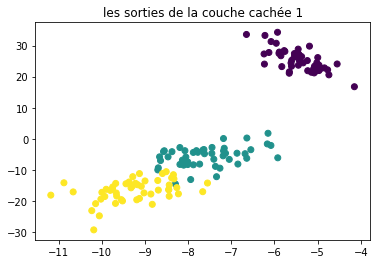

Cette figure represente les sorties de la couche cachée


In [18]:
#3- Affichage ces valeurs dans une figure (avec les classes réelles représentées en couleur)
plt.scatter(a1[:,0], a1[:,1], c=y)
plt.title('les sorties de la couche cachée 1')
plt.show()

print("Cette figure represente les sorties de la couche cachée")

In [19]:
#4- Si on utilise une fonction d'activation logistique


RD_clf = MLPClassifier(hidden_layer_sizes=(2), solver='lbfgs', activation="logistic",learning_rate_init=0.01, random_state=1)
RD_clf.fit(X, y)
rd_y_pred = RD_clf.predict(X)
print('accuracy_score : ', accuracy_score(y, rd_y_pred))
print("les poids de la couche 1:")
w1=RD_clf.coefs_[0]
print(w1)

print("la sortie de la couche 1:")
a1=np.dot(X,w1)
print(a1)

accuracy_score :  0.9866666666666667
les poids de la couche 1:
[[10.96200744  0.2426822 ]
 [ 4.97735325  0.58619306]
 [ 4.46958711 -0.86620255]
 [ 0.03314309 -1.57270526]]
la sortie de la couche 1:
[[ 79.59102487   1.76213032]
 [ 74.90994676   1.42049735]
 [ 73.26605721   1.57581977]
 [ 72.56603856   1.31969174]
 [ 78.99255945   1.7964814 ]
 [ 86.21807315   1.49501038]
 [ 73.61560013   1.42489938]
 [ 78.44404751   1.59262254]
 [ 68.93120771   1.24053694]
 [ 75.85132648   1.54976692]
 [ 84.32205646   1.86555333]
 [ 76.69860473   1.45746584]
 [ 73.8104317    1.55349965]
 [ 66.98855185   1.69201932]
 [ 88.85918928   2.3983449 ]
 [ 91.10143458   2.03415208]
 [ 84.43023831   1.8414914 ]
 [ 79.59433918   1.60485979]
 [ 89.00562575   1.66646627]
 [ 81.53450386   1.69409745]
 [ 83.72276791   1.51645491]
 [ 81.04008285   1.47820762]
 [ 72.81992163   2.04588954]
 [ 79.94637328   0.91321936]
 [ 78.03948087   1.19760508]
 [ 76.90006492   1.27152506]
 [ 78.89763484   1.19146123]
 [ 81.13418432   1.

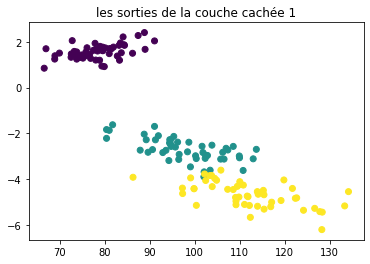

lorsque on utilise une fonction d'activation logistique on obtient une classification bien précisé avec un accuracy elevé


In [20]:
plt.scatter(a1[:,0], a1[:,1], c=y)
plt.title('les sorties de la couche cachée 1')
plt.show()
print("lorsque on utilise une fonction d'activation logistique on obtient une classification bien précisé avec un accuracy elevé")